# Importing Libraries and Dataset

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv("C:/Users/devan/OneDrive/Desktop/user_behavior_dataset.csv")

print(df.head(10))
# See the data

   User ID        Device Model Operating System  App Usage Time (min/day)  \
0        1      Google Pixel 5          Android                     393.0   
1        2           OnePlus 9          Android                     268.0   
2        3        Xiaomi Mi 11          Android                     154.0   
3        4      Google Pixel 5          Android                     239.0   
4        5           iPhone 12              iOS                     187.0   
5        6      Google Pixel 5          Android                      99.0   
6        7  Samsung Galaxy S21          Android                     350.0   
7        8           OnePlus 9          Android                     543.0   
8        9  Samsung Galaxy S21          Android                     340.0   
9       10           iPhone 12              iOS                     424.0   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                   1872.0   
1                         4.7       

In [27]:
print(df.isnull().sum())
# Check for null or missing values

User ID                        0
Device Model                   6
Operating System               6
App Usage Time (min/day)      13
Screen On Time (hours/day)    10
Battery Drain (mAh/day)       10
Number of Apps Installed      11
Data Usage (MB/day)            8
Age                            6
Gender                        11
User Behavior Class            6
dtype: int64


Here we can see a few columns having some null or missing values, as these numbers are very small (~4% of total rows) we can use simply remove them inplace. This can be done by using using df.dropna(inplace = True)

In [28]:
df.dropna(inplace = True)
# Rows containing null and missing values are removed
print(df.isnull().sum())
# Should return 0 for all columns

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [29]:
print(df.drop(columns=["User ID"]).duplicated().sum())
# Check for number of duplicates

5


Since there are some very small number of duplicates found, we can remove them


In [30]:
df = df.loc[~df.drop(columns=["User ID"]).duplicated()]
# Duplicates removed now
print(df.drop(columns=["User ID"]).duplicated().sum())
# Should print 0

0


In [31]:
print(df.info())
# Using info() to see the data

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 710
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     674 non-null    int64  
 1   Device Model                674 non-null    object 
 2   Operating System            674 non-null    object 
 3   App Usage Time (min/day)    674 non-null    float64
 4   Screen On Time (hours/day)  674 non-null    float64
 5   Battery Drain (mAh/day)     674 non-null    float64
 6   Number of Apps Installed    674 non-null    float64
 7   Data Usage (MB/day)         674 non-null    float64
 8   Age                         674 non-null    float64
 9   Gender                      674 non-null    object 
 10  User Behavior Class         674 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 63.2+ KB
None


In [32]:
print(df.describe())
# Using describe() to see the data

          User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  674.000000                674.000000                  674.000000   
mean   355.686944                271.590504                    5.279525   
std    203.593355                176.202390                    3.054093   
min      1.000000                 30.000000                    1.000000   
25%    179.250000                116.000000                    2.500000   
50%    356.500000                228.000000                    4.900000   
75%    530.750000                431.750000                    7.400000   
max    711.000000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               674.000000                674.000000           674.000000   
mean               1529.078635                 50.903561           929.790801   
std                 813.159193                 26.794045           636.412017   


In [33]:
#This is just a function that detects and counts the number of outliers for given numerical columns using IQR for applicable columns.
#This is just for calculation, actual visualization is shown in EDA section later
def count_outliers(df, numerical_cols):
    outlier_counts = {}

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    return pd.Series(outlier_counts)

numerical_columns = ["App Usage Time (min/day)", "Screen On Time (hours/day)","Battery Drain (mAh/day)","Number of Apps Installed","Data Usage (MB/day)","Age"]
outliers = count_outliers(df, numerical_columns)
print(outliers)


App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
dtype: int64


Since the dataset happens to not contain any outliers, we canfinish the Data Cleaning part and move onto the EDA part

# EDA - Exploratory Data Analysis


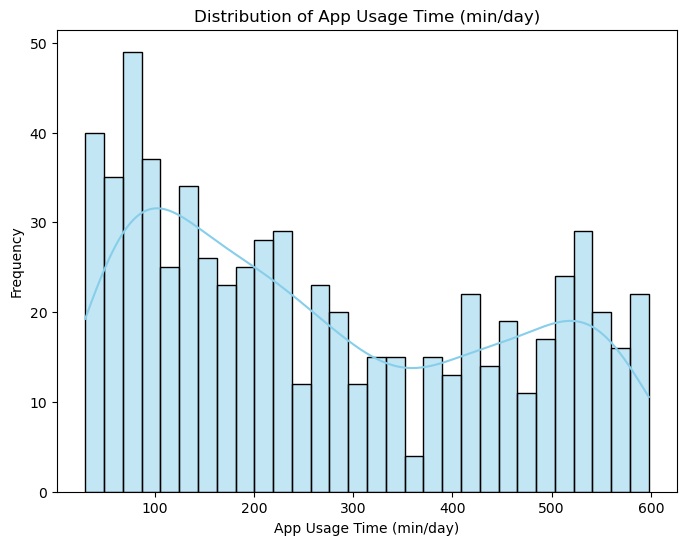

In [34]:
# Histogram of App Usage Time
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()


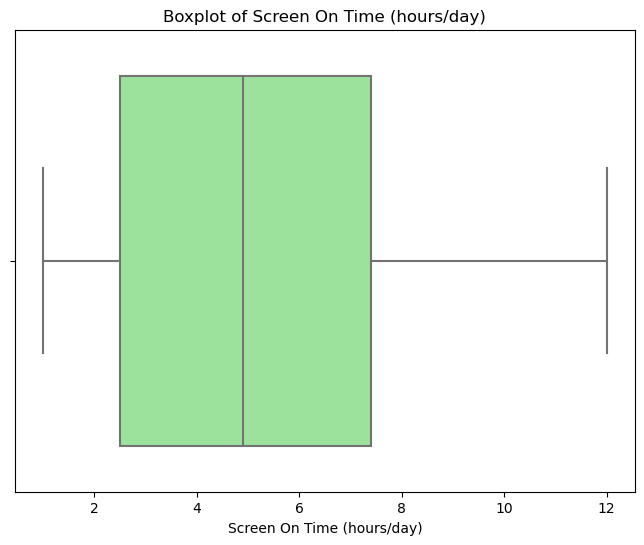

In [35]:
# Boxplot of Screen On Time
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()

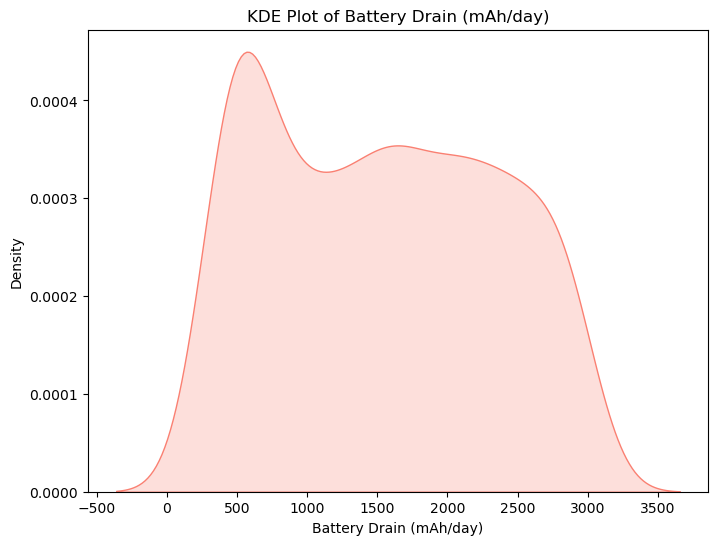

In [36]:
# KDE Plot of Battery Drain
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='salmon')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()


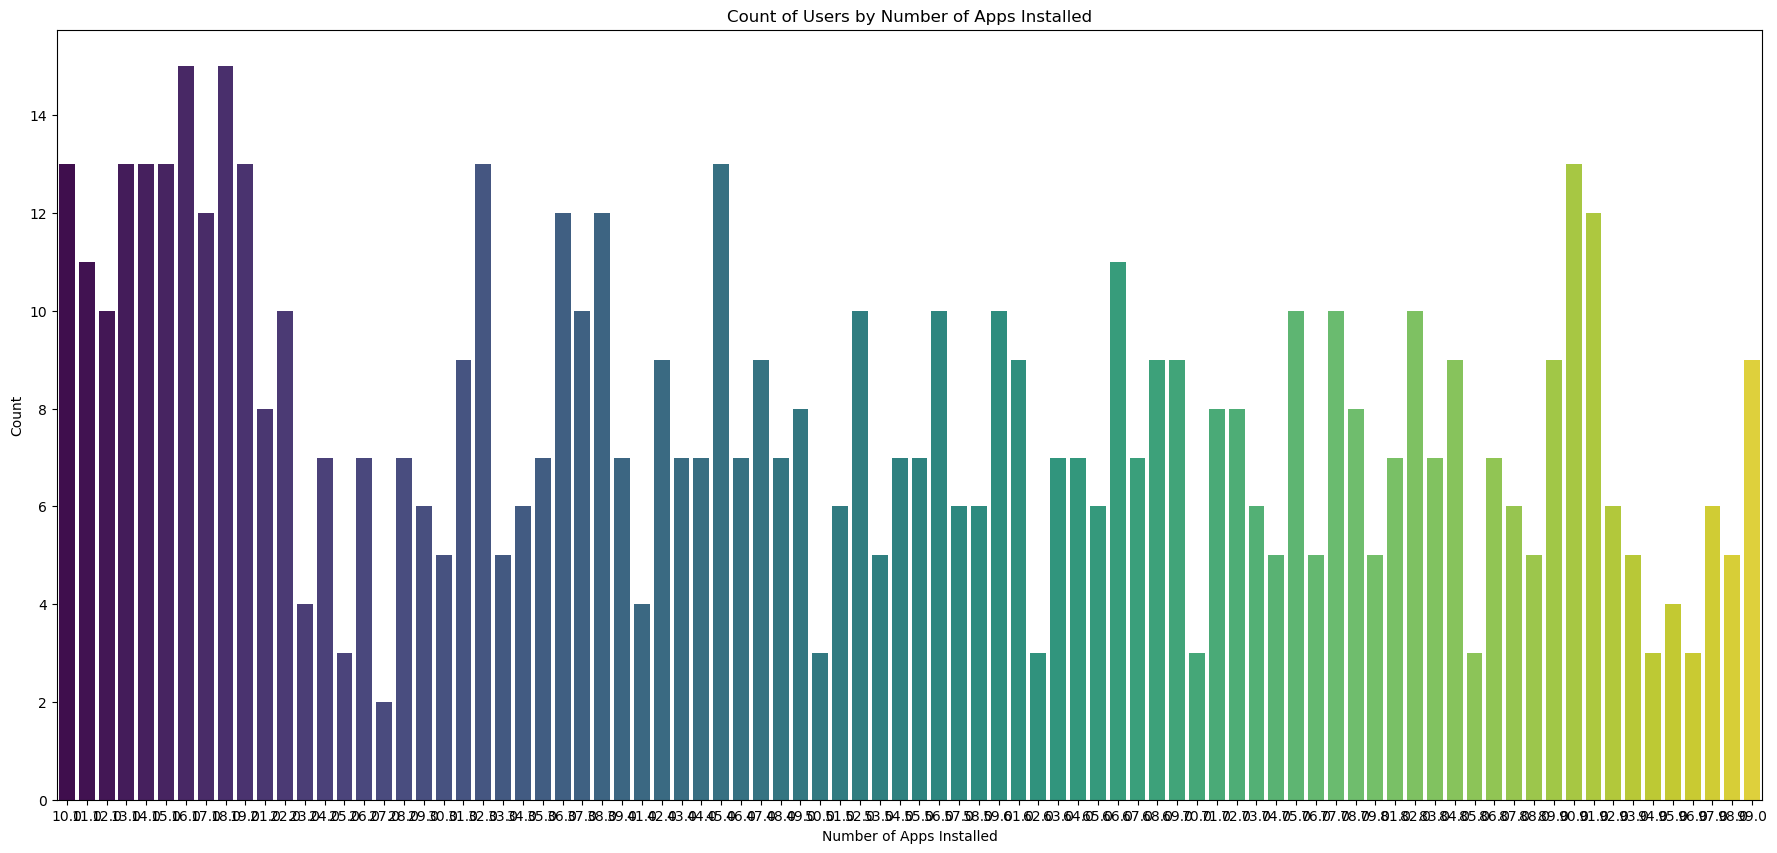

In [37]:
# Countplot of Users by Number of Apps Installed
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df, palette='viridis')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()


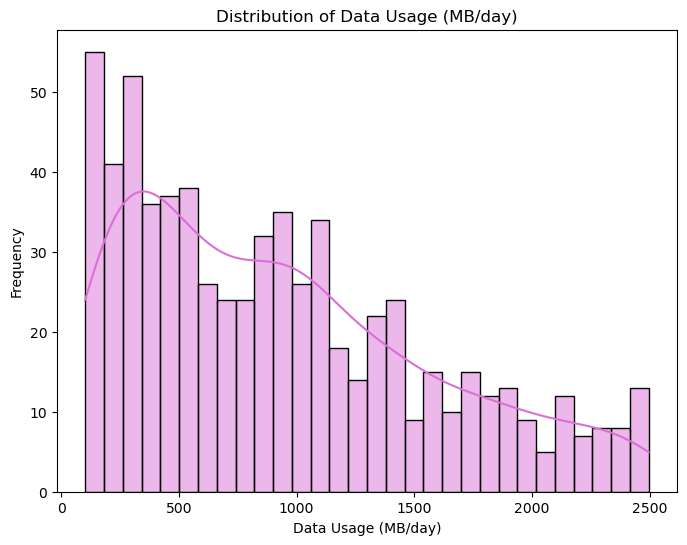

In [38]:
# Histogram of Data Usage
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='orchid', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()


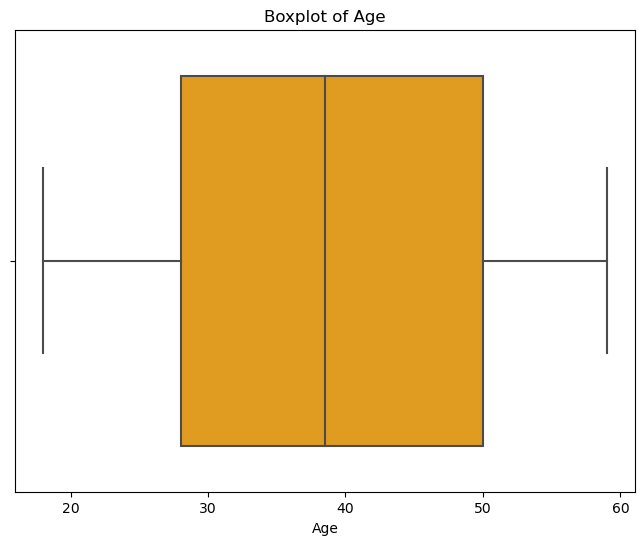

In [39]:
# Boxplot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='orange')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


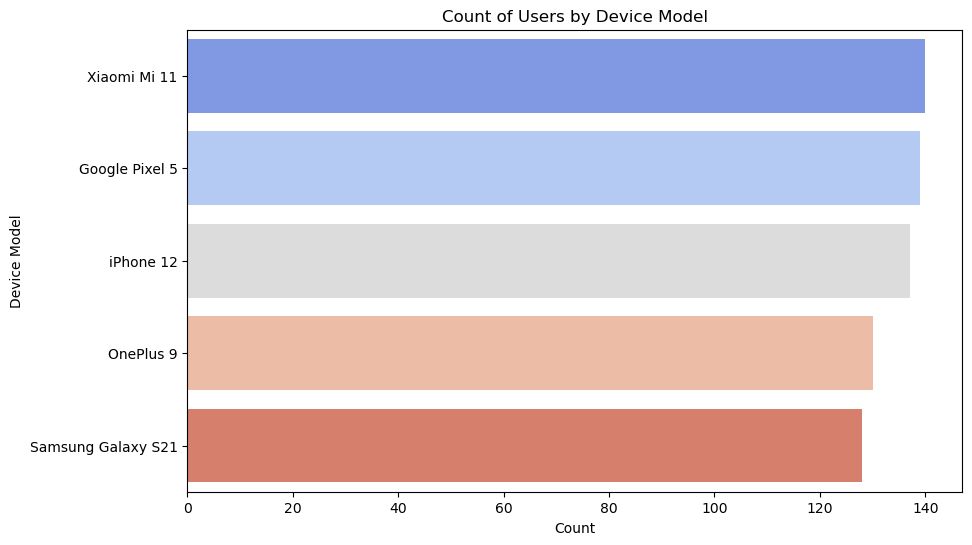

In [40]:
# Countplot of Users by Device Model
plt.figure(figsize=(10, 6))
sns.countplot(y='Device Model', data=df, order=df['Device Model'].value_counts().index, palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()


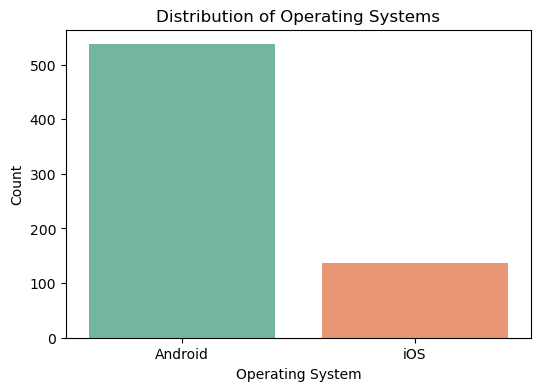

In [41]:
# Countplot for Comparision of Operating Systems
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()


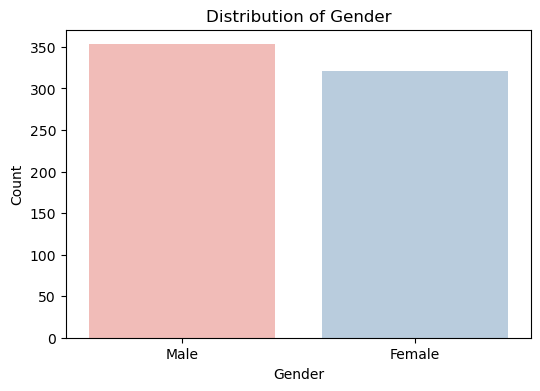

In [42]:
# Countplot for Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Pastel1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


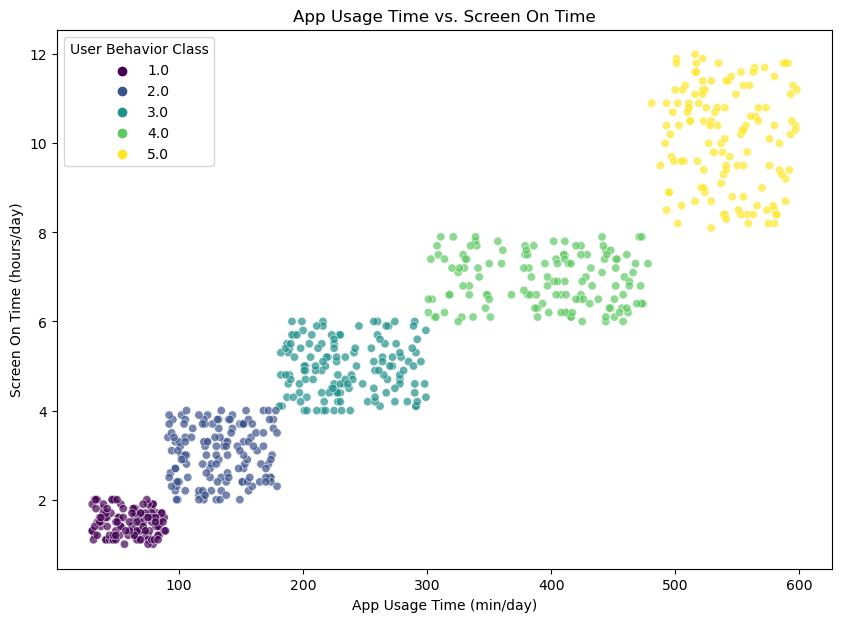

In [43]:
# Scatterplot for App Usage Time vs. Screen On Time
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)', 
    y='Screen On Time (hours/day)', 
    hue='User Behavior Class', 
    palette='viridis', 
    alpha=0.7
)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

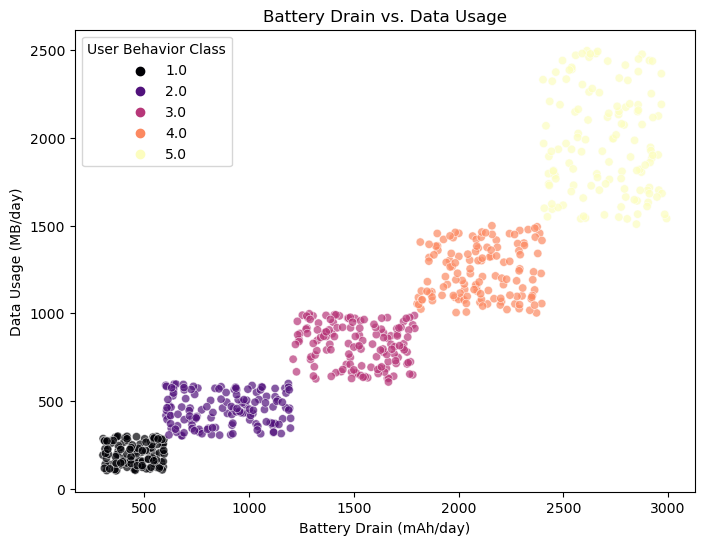

In [44]:
# Scatterplot for Battery Drain vs. Data Usage
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)', y='Data Usage (MB/day)', hue='User Behavior Class', palette='magma', alpha=0.7)
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

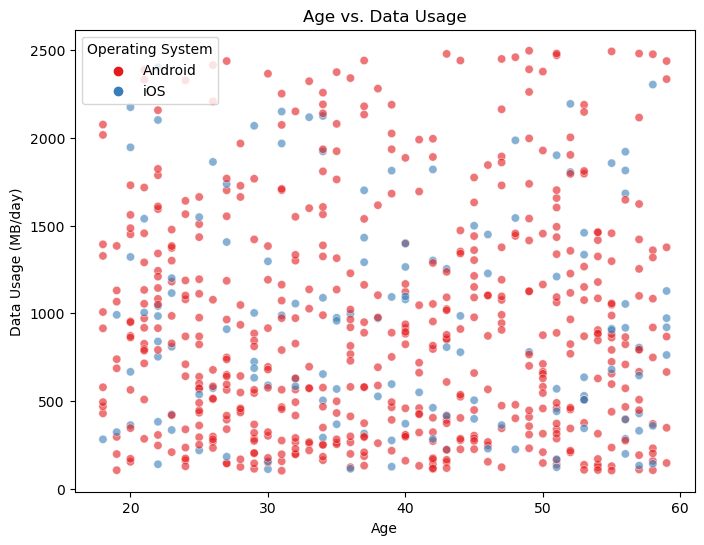

In [45]:
# Scatterplot for Age vs. Data Usage
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Data Usage (MB/day)', hue='Operating System', palette='Set1', alpha=0.6)
plt.title('Age vs. Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()


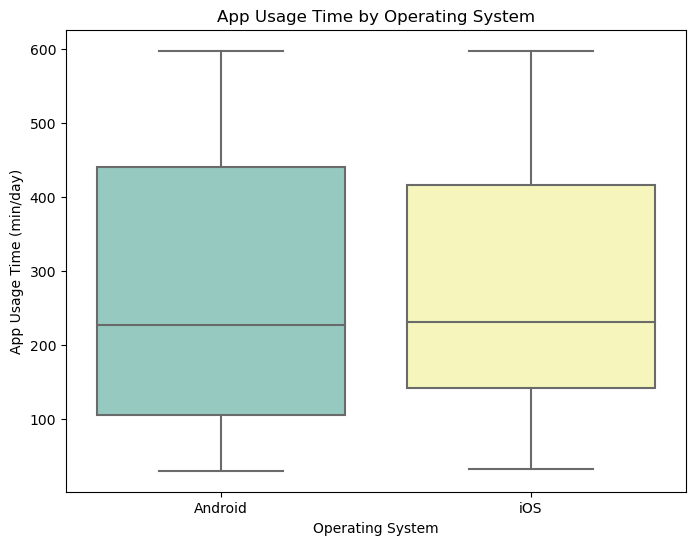

In [46]:
# Boxplots for Comparision of App Usage Time by Operating System
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set3')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()


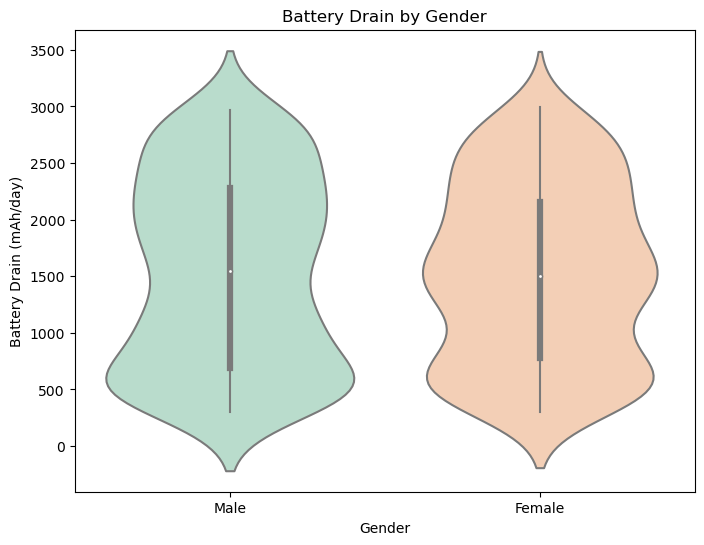

In [47]:
# Violinplot for Comparision of Battery Drain by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Battery Drain (mAh/day)', data=df, palette='Pastel2')
plt.title('Battery Drain by Gender')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


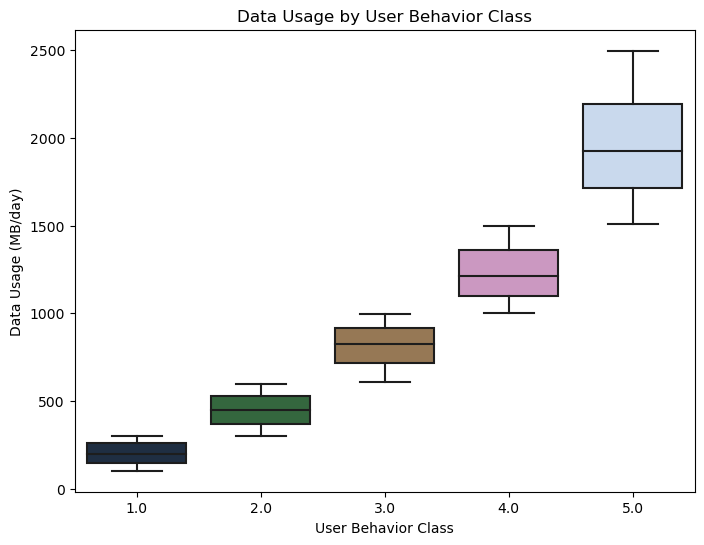

In [48]:
# Boxplot for Comparision of Data Usage by User Behavior Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='cubehelix')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()


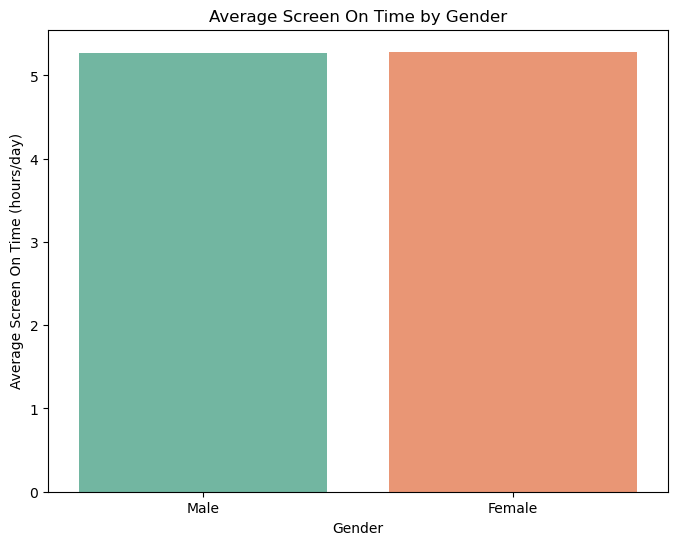

In [49]:
# Barplot for Comparision of Average Screen On Time by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()


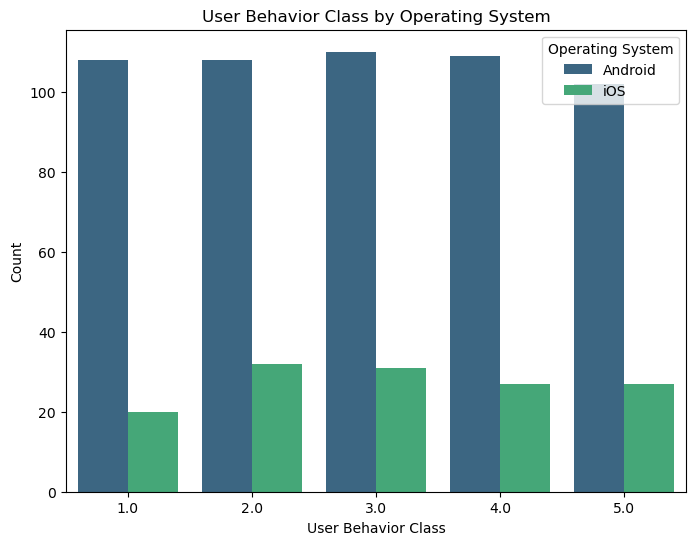

In [50]:
# Countplot for Comparision of User Behavior Class by Operating System
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Operating System', data=df, palette='viridis')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()


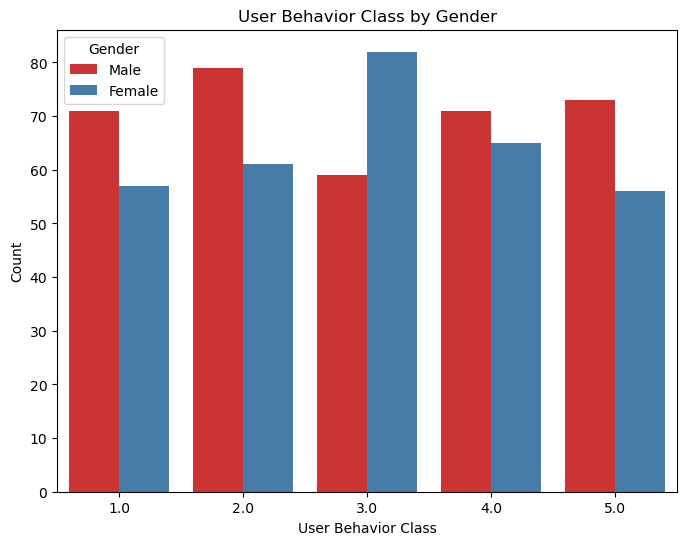

In [51]:
# Countplot for Coparision of User Behavior Class by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='Set1')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


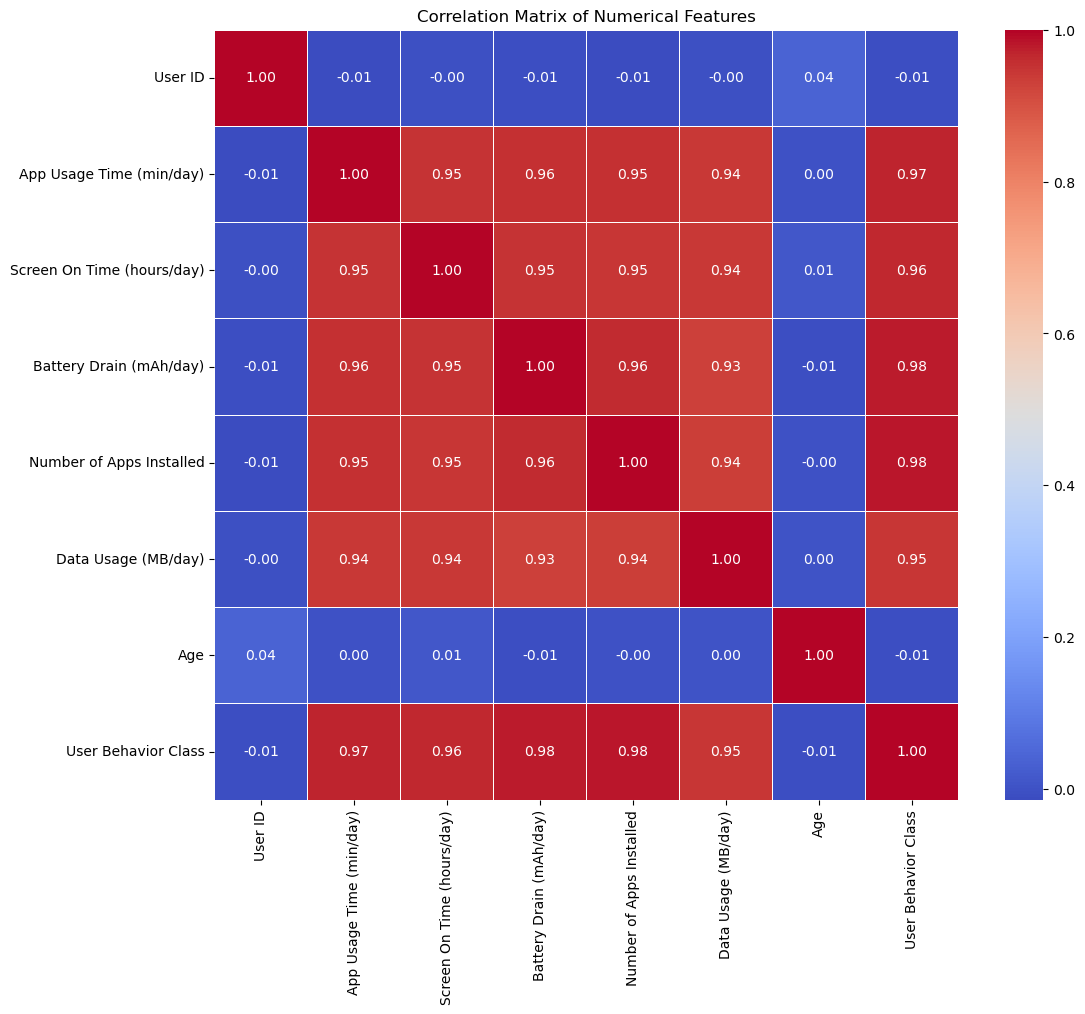

In [52]:
# Correlation matrix for all Numerical Features
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


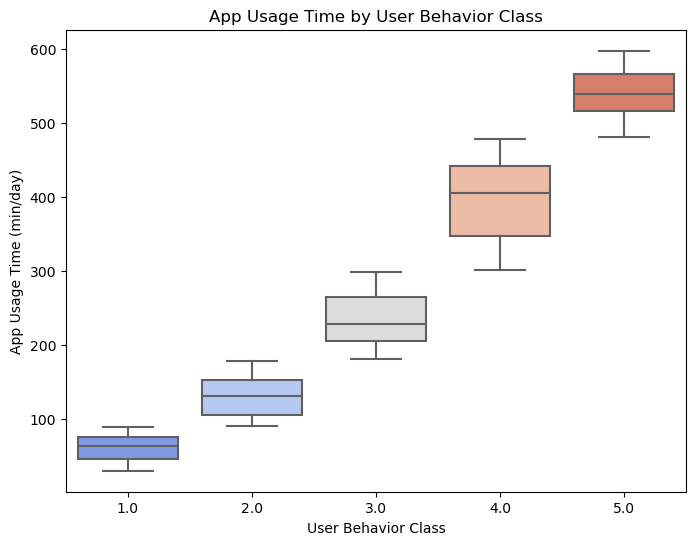

In [53]:
# Boxplot for Comparision of App Usage Time by User Behavior Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df, palette='coolwarm')
plt.title('App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
plt.show()


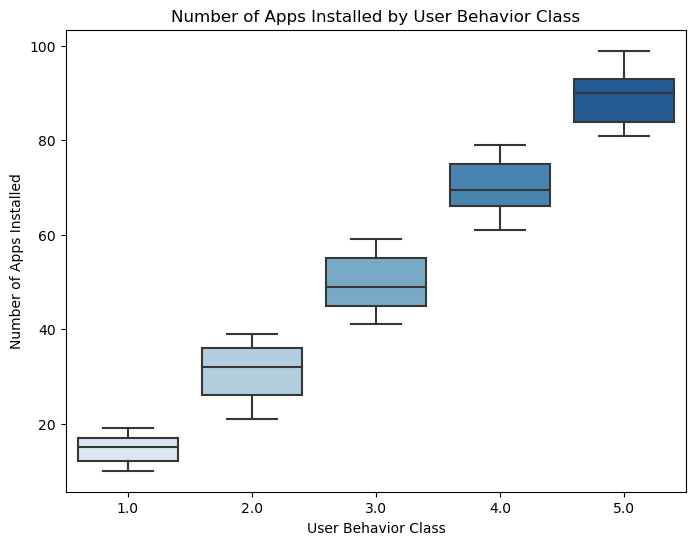

In [54]:
# Boxplot for Comparision of Number of Apps Installed by User Behavior Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=df, palette='Blues')
plt.title('Number of Apps Installed by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Apps Installed')
plt.show()


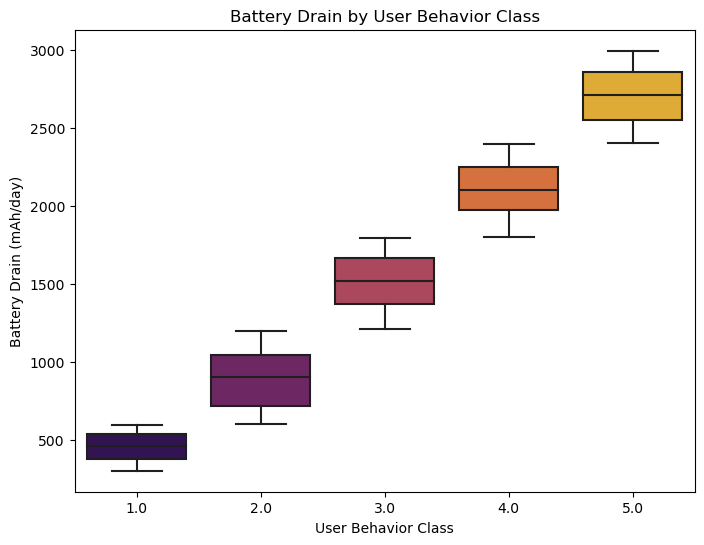

In [55]:
# Boxplot for Comparision of Battery Drain by User Behavior Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df, palette='inferno')
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


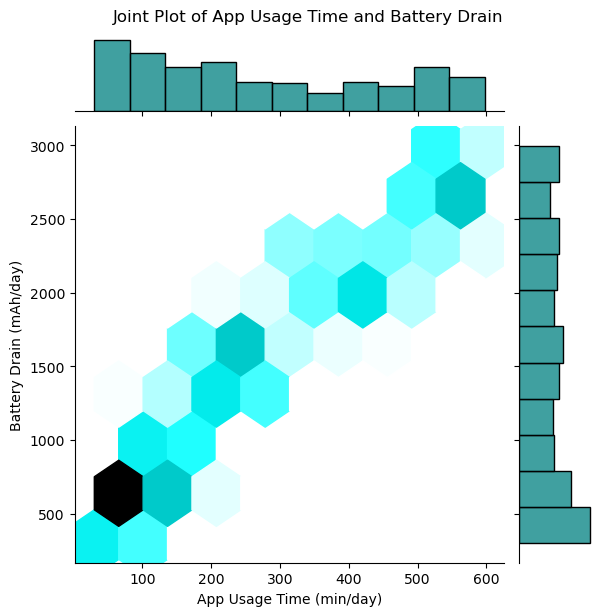

In [56]:
# Joinplot for Comparision of App Usage Time and Battery Drain
sns.jointplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, kind='hex', color='teal')
plt.suptitle('Joint Plot of App Usage Time and Battery Drain', y=1.02)
plt.show()


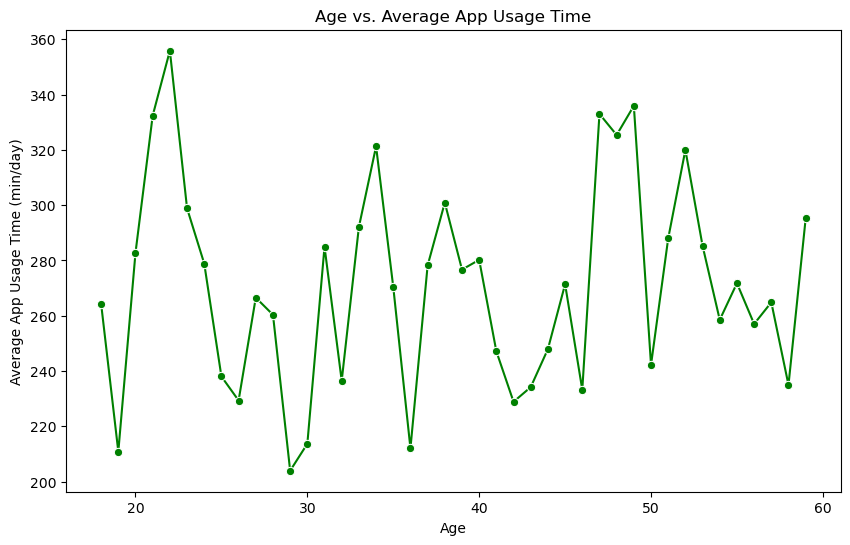

In [57]:
# Lineplot for Comparision of Age vs. Average App Usage Time
plt.figure(figsize=(10, 6))
age_usage = df.groupby('Age')['App Usage Time (min/day)'].mean().reset_index()
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=age_usage, marker='o', color='green')
plt.title('Age vs. Average App Usage Time')
plt.xlabel('Age')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()


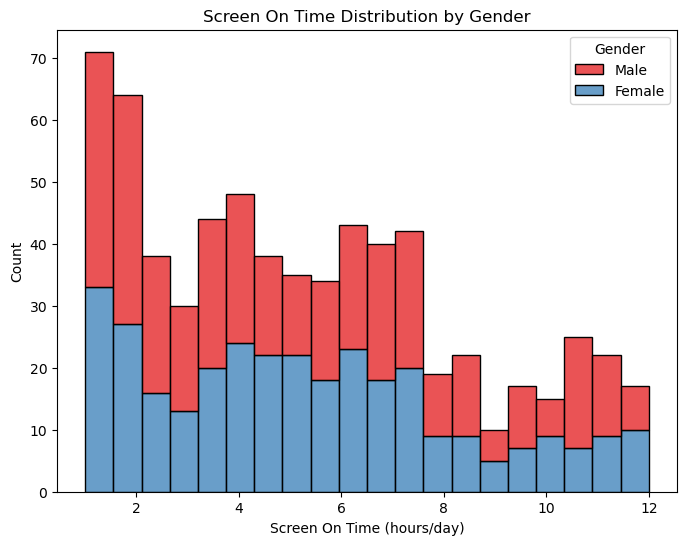

In [58]:
# Histogram of Screen On Time Distribution by Gender
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Screen On Time (hours/day)', hue='Gender', multiple='stack', palette='Set1', bins=20)
plt.title('Screen On Time Distribution by Gender')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Count')
plt.show()


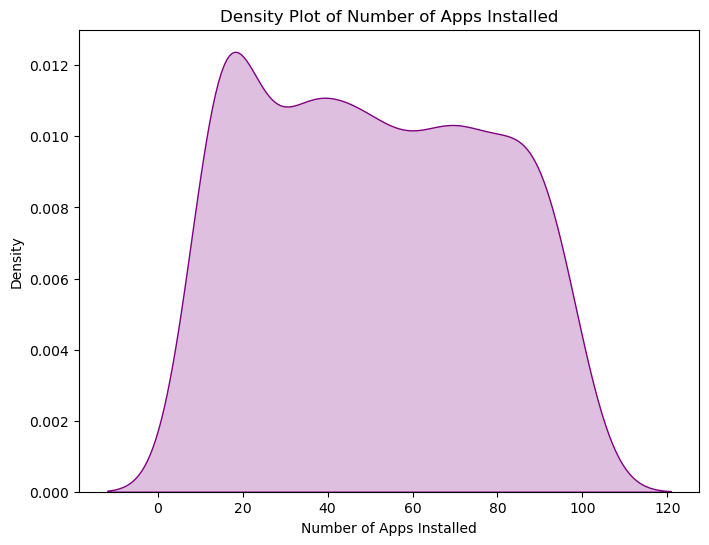

In [59]:
# KDE of Density Plot of Number of Apps Installed
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Number of Apps Installed', shade=True, color='purple')
plt.title('Density Plot of Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Density')
plt.show()


# Exploratory Data Analysis Summary  


This EDA provides valuable insights into the dataset and reveals patterns among multiple features. The data distribution appears mostly balanced across different categories, with the exception of the **iOS vs. Android** division, which shows noticeable disparity.  

Additionally, some features exhibit a strong correlation. For instance, **Screen On Time** and **App Usage Time** demonstrate a high positive correlation, which aligns with real-world expectations—users who spend more time on their devices tend to have higher app usage.  

These insights help in understanding user behavior and can guide further data preprocessing and feature selection for modeling.
